In [1]:
!pip install tensorflow tensorflow-gpu opencv-python mediapipe sklearn matplotlib
# opencv is used for webcam and live video feed 
# mediapipe is used for keypoint extraction 
# sklearn is used for evaluation matrix, model accuracy and train and test split of data 
# matplotlib is used for visualisation of images

In [2]:
!pip install --upgrade pip

In [3]:
import cv2
import numpy as np # for working with arrays
import os # for working with file paths
from matplotlib import pyplot as plt # for visualisation of images
import time # for working with frames of live video
import mediapipe as mp

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model for object detection
mp_drawing = mp.solutions.drawing_utils # Drawing utilities for drawing the detections from mediapipe

In [5]:
# Opencv detects image in BGR Format and Mediapipe detects image in RGB so we have to perform colour conversion on image 
# before passing the image from Opencv to mediapipe functions. 

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB 
    image.flags.writeable = False                  # Image is no longer writeable to save memory
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(100,110,50), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(100,256,121), thickness=1, circle_radius=1)
                             )
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(90,32,20), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(90,54,221), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(221,32,86), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(221,54,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(255,120,65), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(255,76,235), thickness=2, circle_radius=2)
                             ) 

In [46]:
#FOR CAPTURING LIVE VIDEO FEED USING OPENCV

cap = cv2.VideoCapture(0) #DEFAULT VIDEO FEED 

# Set mediapipe model 
# min_detection_confidence is the initial tracking parameter and tracking confidence is the tracking parameter for the holistic 
# mediapipe model

with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened(): # loop through all the frames to make a video

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('Sign Language Detector', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [7]:
draw_landmarks(frame, results)

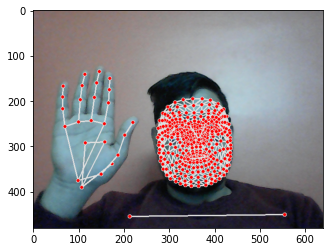

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [9]:
np.array(results.right_hand_landmarks.landmark)

array([x: 0.15623291
y: 0.7830004
z: 4.2295102e-07
,
       x: 0.23571028
y: 0.753229
z: -0.036304373
,
       x: 0.29294258
y: 0.6654038
z: -0.043918155
,
       x: 0.31578895
y: 0.57499605
z: -0.048330594
,
       x: 0.34375724
y: 0.5149767
z: -0.05114692
,
       x: 0.24669106
y: 0.5220623
z: -0.0047094356
,
       x: 0.26046214
y: 0.4269777
z: -0.01815549
,
       x: 0.26329675
y: 0.365612
z: -0.033037037
,
       x: 0.2648268
y: 0.31444123
z: -0.044574223
,
       x: 0.20093782
y: 0.5070046
z: 0.000644497
,
       x: 0.21244745
y: 0.40183106
z: -0.010939375
,
       x: 0.22008735
y: 0.3351016
z: -0.025780836
,
       x: 0.22819287
y: 0.28162146
z: -0.03686937
,
       x: 0.15675128
y: 0.51254475
z: -0.0003861447
,
       x: 0.16291924
y: 0.41048816
z: -0.015890129
,
       x: 0.17012085
y: 0.3466376
z: -0.02993083
,
       x: 0.17950542
y: 0.29455268
z: -0.039242852
,
       x: 0.10975463
y: 0.5349919
z: -0.005471316
,
       x: 0.10305675
y: 0.4523637
z: -0.022229146
,
       x: 

In [10]:
len(results.right_hand_landmarks.landmark)

21

In [11]:
# TO WORK WITH THE RESULTS WE NEED TO CONVERT THE LANDMARKS INTO A NUMPY ARRAY. 

pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [44]:
# SIMILARLY CONVERT REST OF THE LANDMARKS INTO A NUMPY ARRAY. IF THE OBJECT IS NOT DETECTED WE WILL INITALIZE IT WITH A 
# ZERO ARRAY THAT MEANS THE OBEJCT WAS NOT DETECTED IN THE FRAME.

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [13]:
extract_keypoints(results).shape

(1662,)

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.57242692,  0.59447223, -1.38435721, ...,  0.10417248,
        0.34806049, -0.03797011])

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.57242692,  0.59447223, -1.38435721, ...,  0.10417248,
        0.34806049, -0.03797011])

In [8]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['accident', 'call', 'doctor','help', 'hot', 'lose','pain','thief'])

# Sixty videos per action
no_sequences = 60

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
#start_folder = 30

In [11]:
# WE ARE CREATING 1 FOLDER FOR EACH ACTION AND EACH FOLDER WILL CONTAIN 30 VIDEOS AND EACH VIDEO WILL HAVE 30 FRAMES. 

# for action in actions: 
#     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
#     for sequence in range(1,no_sequences+1):
#         try: 
#             os.makedirs(os.path.join(DATA_PATH, action, str(dirmax+sequence)))
#         except:
#             pass

In [21]:
#For building the dataset

# cap = cv2.VideoCapture(0)
# # Set mediapipe model 
# with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
#     # NEW LOOP
#     # Loop through actions
#     for action in actions:
#         # Loop through sequences/videos
#         for sequence in range(1,no_sequences+1):
#             # Loop through video length aka sequence length
#             for frame_num in range(sequence_length):

#                 # Read feed
#                 ret, frame = cap.read()

#                 # Make detections
#                 image, results = mediapipe_detection(frame, holistic)

#                 # Draw landmarks
#                 draw_styled_landmarks(image, results)
                
#                 # NEW Apply wait logic
#                 if frame_num == 0: 
#                     cv2.putText(image, 'STARTING COLLECTION', (120,200), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
#                     cv2.waitKey(1000)
#                 else: 
#                     cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
#                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
#                     # Show to screen
#                     cv2.imshow('OpenCV Feed', image)
                
#                 # NEW Export keypoints
#                 keypoints = extract_keypoints(results)
#                 npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
#                 np.save(npy_path, keypoints)

#                 # Break gracefully
#                 if cv2.waitKey(10) & 0xFF == ord('q'):
#                     break
                    
#     cap.release()
#     cv2.destroyAllWindows()

In [9]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [10]:
label_map = {label:num for num, label in enumerate(actions)}

In [11]:
label_map

{'accident': 0,
 'call': 1,
 'doctor': 2,
 'help': 3,
 'hot': 4,
 'lose': 5,
 'pain': 6,
 'thief': 7}

In [12]:
#Extract the numpy arrays and combine them to feed into the model 

sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [13]:
np.array(sequences).shape

(480, 30, 1662)

In [14]:
np.array(labels).shape

(480,)

In [15]:
X = np.array(sequences)

In [16]:
X.shape

(480, 30, 1662)

In [17]:
y = to_categorical(labels).astype(int)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [19]:
X_train.shape

(456, 30, 1662)

In [20]:
y_test.shape

(24, 8)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard
from keras.layers import LeakyReLU
# from tensorflow.keras.layers import Bidirectional

In [22]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [23]:
#Building our LSTM model

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(30,1662)))
model.add(LeakyReLU(alpha=0.05))
# model.add(LSTM(128, return_sequences=True))
# model.add(LeakyReLU(alpha=0.05))
model.add(LSTM(64, return_sequences=False))
model.add(LeakyReLU(alpha=0.05))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [24]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [29]:
model.fit(X_train, y_train, epochs=220, callbacks=[tb_callback])

Epoch 1/220
15/15 [==============================] - 9s 387ms/step - loss: 2.0790 - categorical_accuracy: 0.1447
Epoch 2/220
15/15 [==============================] - 2s 101ms/step - loss: 2.0457 - categorical_accuracy: 0.1776
Epoch 3/220
15/15 [==============================] - 1s 92ms/step - loss: 1.9628 - categorical_accuracy: 0.2171
Epoch 4/220
15/15 [==============================] - 1s 92ms/step - loss: 1.8324 - categorical_accuracy: 0.2522
Epoch 5/220
15/15 [==============================] - 1s 96ms/step - loss: 1.6990 - categorical_accuracy: 0.2632
Epoch 6/220
15/15 [==============================] - 2s 104ms/step - loss: 1.6250 - categorical_accuracy: 0.2697
Epoch 7/220
15/15 [==============================] - 2s 104ms/step - loss: 1.5898 - categorical_accuracy: 0.2610
Epoch 8/220
15/15 [==============================] - 2s 121ms/step - loss: 1.6130 - categorical_accuracy: 0.2895
Epoch 9/220
15/15 [==============================] - 2s 125ms/step - loss: 1.6095 - categorical_acc

15/15 [==============================] - 2s 105ms/step - loss: 0.5113 - categorical_accuracy: 0.8202
Epoch 72/220
15/15 [==============================] - 2s 107ms/step - loss: 0.7333 - categorical_accuracy: 0.7259
Epoch 73/220
15/15 [==============================] - 2s 105ms/step - loss: 0.5237 - categorical_accuracy: 0.8004
Epoch 74/220
15/15 [==============================] - 2s 105ms/step - loss: 0.4534 - categorical_accuracy: 0.8070
Epoch 75/220
15/15 [==============================] - 2s 119ms/step - loss: 0.5720 - categorical_accuracy: 0.7719
Epoch 76/220
15/15 [==============================] - 2s 117ms/step - loss: 0.5302 - categorical_accuracy: 0.7895
Epoch 77/220
15/15 [==============================] - 2s 109ms/step - loss: 0.4903 - categorical_accuracy: 0.7917
Epoch 78/220
15/15 [==============================] - 2s 107ms/step - loss: 0.4554 - categorical_accuracy: 0.8048
Epoch 79/220
15/15 [==============================] - 2s 113ms/step - loss: 0.3772 - categorical_accu

15/15 [==============================] - 2s 117ms/step - loss: 0.1156 - categorical_accuracy: 0.9649
Epoch 143/220
15/15 [==============================] - 2s 117ms/step - loss: 0.1235 - categorical_accuracy: 0.9539
Epoch 144/220
15/15 [==============================] - 2s 116ms/step - loss: 0.0980 - categorical_accuracy: 0.9649
Epoch 145/220
15/15 [==============================] - 2s 127ms/step - loss: 0.0941 - categorical_accuracy: 0.9759
Epoch 146/220
15/15 [==============================] - 2s 135ms/step - loss: 0.1082 - categorical_accuracy: 0.9561
Epoch 147/220
15/15 [==============================] - 2s 117ms/step - loss: 0.1586 - categorical_accuracy: 0.9452
Epoch 148/220
15/15 [==============================] - 2s 124ms/step - loss: 0.1175 - categorical_accuracy: 0.9649
Epoch 149/220
15/15 [==============================] - 2s 130ms/step - loss: 0.1391 - categorical_accuracy: 0.9518
Epoch 150/220
15/15 [==============================] - 2s 120ms/step - loss: 0.2694 - categori

15/15 [==============================] - 2s 120ms/step - loss: 0.0277 - categorical_accuracy: 0.9934
Epoch 214/220
15/15 [==============================] - 2s 119ms/step - loss: 0.0295 - categorical_accuracy: 0.9912
Epoch 215/220
15/15 [==============================] - 2s 119ms/step - loss: 0.0228 - categorical_accuracy: 0.9934
Epoch 216/220
15/15 [==============================] - 2s 120ms/step - loss: 0.0194 - categorical_accuracy: 0.9934
Epoch 217/220
15/15 [==============================] - 2s 129ms/step - loss: 0.0179 - categorical_accuracy: 0.9934
Epoch 218/220
15/15 [==============================] - 2s 134ms/step - loss: 0.0178 - categorical_accuracy: 0.9934
Epoch 219/220
15/15 [==============================] - 2s 135ms/step - loss: 0.0172 - categorical_accuracy: 0.9956
Epoch 220/220
15/15 [==============================] - 2s 121ms/step - loss: 0.0176 - categorical_accuracy: 0.9956


In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 128)           916992    
_________________________________________________________________
module_wrapper (ModuleWrappe (None, 30, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
module_wrapper_1 (ModuleWrap (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 64)                4160      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 2

In [30]:
res = model.predict(X_test)

In [31]:
actions[np.argmax(res[3])]

'thief'

In [32]:
actions[np.argmax(y_test[3])]

'thief'

In [33]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [34]:
y_pred = model.predict(X_test)

In [35]:
y_pred_train = model.predict(X_train)

In [36]:
y_true = np.argmax(y_test, axis=1).tolist()
y_pred = np.argmax(y_pred, axis=1).tolist()

In [37]:
y_true_train = np.argmax(y_train, axis=1).tolist()
y_pred_train = np.argmax(y_pred_train, axis=1).tolist()

In [38]:
np.array(y_pred)

array([2, 5, 5, 7, 2, 2, 5, 3, 1, 3, 0, 3, 6, 7, 3, 5, 4, 2, 6, 1, 2, 2,
       5, 0])

In [39]:
np.array(y_true)

array([3, 5, 5, 7, 2, 3, 5, 3, 6, 3, 0, 3, 6, 7, 3, 5, 4, 2, 1, 1, 2, 3,
       5, 0])

In [40]:
multilabel_confusion_matrix(y_true, y_pred)

array([[[22,  0],
        [ 0,  2]],

       [[21,  1],
        [ 1,  1]],

       [[18,  3],
        [ 0,  3]],

       [[17,  0],
        [ 3,  4]],

       [[23,  0],
        [ 0,  1]],

       [[19,  0],
        [ 0,  5]],

       [[21,  1],
        [ 1,  1]],

       [[22,  0],
        [ 0,  2]]], dtype=int64)

In [41]:
accuracy_score(y_true, y_pred)

0.7916666666666666

In [42]:
accuracy_score(y_true_train, y_pred_train)

0.9956140350877193

In [45]:
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0] # to get the required shape we transform the data
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Visualisation logic
            if np.unique(predictions[-20:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

#             # Viz probabilities
#             image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class 'mediapipe.python.solution_base.SolutionOutputs'>
help
<class '